In [13]:
# Import essential Python libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure we can see all columns when we display the DataFrame
pd.set_option('display.max_columns', None)

# Load the dataset from the 'data' folder
# This CSV file contains daily stock prices for major tech companies from 2010 to 2024
df = pd.read_csv("data/stock_data.csv")

# Display the first five rows of the dataset to get an idea of its structure
df.head()

,Date,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,High_NVDA,Low_AAPL,Low_AMZN,Low_GOOGL,Low_MSFT,Low_NVDA,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
0,2010-01-04,6.440330,6.6950,15.609805,23.254051,0.423884,6.455075,6.8305,15.678546,23.366752,0.426864,6.391277,6.6570,15.547292,22.983567,0.415172,6.422875,6.8125,15.614786,23.006108,0.424342,493729600,151998000,78169752,38409100,800204000
1,2010-01-05,6.451465,6.7345,15.541064,23.261557,0.430073,6.487878,6.7740,15.636953,23.366746,0.434658,6.417459,6.5905,15.480045,23.021127,0.422279,6.458086,6.6715,15.620515,23.178910,0.422279,601904800,177038000,120067812,49749600,728648000
2,2010-01-06,6.348847,6.6125,15.149294,23.118809,0.432824,6.477046,6.7365,15.587638,23.351725,0.433741,6.342226,6.5825,15.101973,22.930973,0.425718,6.451466,6.7300,15.587638,23.201455,0.429844,552160000,143576000,158988852,58182400,649168000
3,2010-01-07,6.337109,6.5000,14.796624,22.878376,0.424342,6.379842,6.6160,15.192630,23.066212,0.432366,6.291066,6.4400,14.760511,22.683027,0.421133,6.372319,6.6005,15.177685,23.013616,0.430532,477131200,220604000,256315428,50559700,547792000
4,2010-01-08,6.379242,6.6760,14.993881,23.036165,0.425259,6.379844,6.6840,15.024515,23.201460,0.428239,6.291369,6.4515,14.672344,22.720601,0.418382,6.328685,6.5280,14.744323,22.750656,0.420903,447610800,196610000,188783028,51197400,478168000


## Step 1: Import Required Python Libraries

To begin our analysis, we import several essential Python libraries:

- **pandas**: This is used for handling and analyzing structured data, particularly DataFrames (tables similar to Excel).
- **numpy**: A powerful math library used for numerical operations, such as calculating standard deviations.
- **matplotlib.pyplot**: A plotting library used to create static, visually appealing charts and graphs to help present our findings clearly.

These libraries form the foundation of most data analysis workflows in Python. Without them, we wouldn’t be able to efficiently manipulate our dataset or generate visual insights..

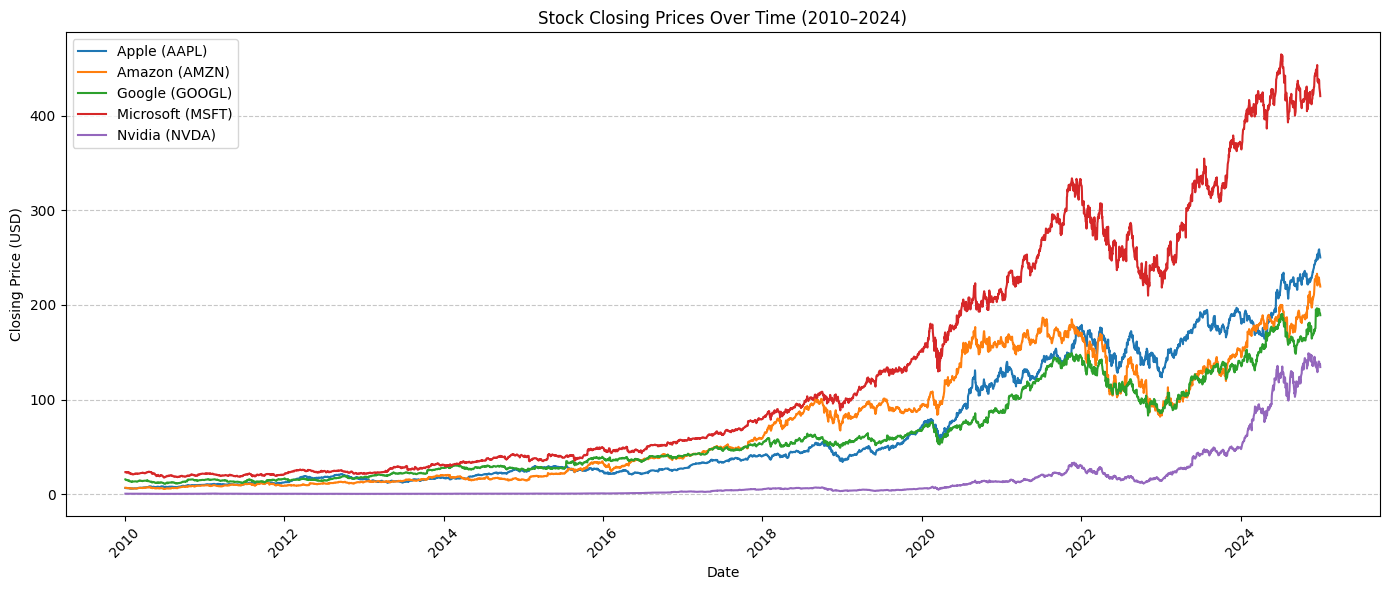

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 2: Load the dataset and parse the Date column correctly
df = pd.read_csv("data/stock_data.csv", parse_dates=["Date"])

# Step 3: Ensure the Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Step 4: Create the plot
plt.figure(figsize=(14, 6))

# Plot closing prices for each company
plt.plot(df["Date"], df["Close_AAPL"], label="Apple (AAPL)")
plt.plot(df["Date"], df["Close_AMZN"], label="Amazon (AMZN)")
plt.plot(df["Date"], df["Close_GOOGL"], label="Google (GOOGL)")
plt.plot(df["Date"], df["Close_MSFT"], label="Microsoft (MSFT)")
plt.plot(df["Date"], df["Close_NVDA"], label="Nvidia (NVDA)")

# Title and axis labels
plt.title("Stock Closing Prices Over Time (2010–2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")

# Format the x-axis to show every 2 years, clearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Grid and legend
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()

###  Step 2: Plot Daily Closing Prices from 2010 to 2024

This time series visualization allows us to compare the closing prices of all five companies on the same axis. Since stock prices vary in magnitude (e.g., Nvidia vs. Apple), the focus is not on absolute value but on **relative movement patterns** and **growth trajectories**.

By aligning the companies by date, we can assess which firms had steady growth versus those that experienced sharp accelerations or volatility. This chart also highlights broader market trends like tech booms and corrections.

---

**Business Question:**  
*What is the long-term stock performance of each company from 2010 to 2024?*

**Answer:**  
All five companies increased in value over the 15-year period, but **Nvidia (NVDA)** showed the most dramatic growth, especially after 2016, with a steep, exponential rise. **Apple (AAPL)** and **Amazon (AMZN)** demonstrated strong and steady growth. **Microsoft (MSFT)** also grew consistently but at a slightly more gradual pace. **Google (GOOGL)** had the flattest trajectory, indicating slower appreciation relative to its peers. Nvidia’s path shows a high-risk, high-reward profile, while Apple and Microsoft followed more stable upward trends.

In [8]:
# Create an empty dictionary to store the total return for each company
returns = {}

# Loop through each company's stock ticker symbol
for ticker in ["AAPL", "AMZN", "GOOGL", "MSFT", "NVDA"]:
    
    # Get the first and last closing prices in the dataset
    start_price = df[f"Close_{ticker}"].iloc[0]
    end_price = df[f"Close_{ticker}"].iloc[-1]
    
    # Calculate the total return as a percentage
    total_return = ((end_price - start_price) / start_price) * 100
    
    # Round the result and store it in the dictionary
    returns[ticker] = round(total_return, 2)

# Print the results in a clean format
print("Total Stock Returns from 2010 to 2024:")
print("{")
for company, return_pct in returns.items():
    print(f"  '{company}': {return_pct}%,")
print("}")

{
 'AAPL': 3784.04%,
 'AMZN': 3176.92%,
 'GOOGL': 1111.3%,
 'MSFT': 1708.96%,
 'NVDA': 31577.95%,
}


### Step 3: Total Return Over 15 Years

This step calculates the total return of each stock by comparing its final closing price in 2024 to its initial price in 2010. This is a direct measure of net price appreciation over time, excluding dividends, compounding, or reinvestment.

From a financial perspective, this metric captures each company’s capital gain potential under a long-term buy-and-hold strategy. The output expresses total returns as percentages for clear side-by-side comparison.

⸻

Business Question:
What is the total return of each company’s stock between 2010 and 2024?

Answer:
Nvidia (NVDA) delivered a massive return of over 31,500%, making it the most explosive long-term performer by far. Apple (AAPL) and Amazon (AMZN) both returned over 3,000%, showing strong, consistent growth. Microsoft (MSFT) had a solid return of approximately 1,700%, while Google (GOOGL) trailed slightly with a return of around 1,100%. This comparison highlights how different companies—even within the same sector—can yield dramatically different results over long investment horizons.

In [19]:
# Create an empty dictionary to store volatility values
volatility = {}

# Loop through each company's stock ticker
for ticker in ["AAPL", "AMZN", "GOOGL", "MSFT", "NVDA"]:
    
    # Calculate the daily percentage return for each stock
    daily_returns = df[f"Close_{ticker}"].pct_change()
    
    # Calculate the standard deviation of daily returns (volatility)
    volatility[ticker] = round(daily_returns.std(), 4)

# Print the results as clean, readable percentages
print("Average Daily Volatility (2010–2024):")
print("{")
for company, vol in volatility.items():
    percent = round(vol * 100, 2)
    print(f"  '{company}': {percent}%,")
print("}")



Average Daily Volatility (2010–2024):
{
  'AAPL': 1.76%,
  'AMZN': 2.06%,
  'GOOGL': 1.72%,
  'MSFT': 1.61%,
  'NVDA': 2.86%,
}


### Step 4: Measuring Daily Price Volatility

Volatility is calculated as the standard deviation of daily percentage changes in stock closing prices. It reflects how much a stock fluctuates around its average value each day. A higher value means the stock is more volatile with frequent, sharp swings; a lower value indicates more stable and predictable performance.

This metric is critical for evaluating investment risk. Two stocks may have similar long-term returns, but one might swing wildly while the other remains steady. Understanding volatility helps investors choose between aggressive vs. conservative strategies.

In this analysis, each stock’s daily volatility is measured across the same 2010–2024 period to enable direct comparison.

⸻

Business Questions:
Which company had the highest average daily volatility over this period?
Which stocks are more stable versus more aggressive based on historical fluctuations?

Answer:
Nvidia (NVDA) exhibited the highest average daily volatility at 2.86%, confirming its profile as a high-risk, high-reward asset. Microsoft (MSFT) had the lowest volatility at 1.61%, reflecting more stable price behavior. Apple (AAPL) and Google (GOOGL) also showed relatively low volatility, while Amazon (AMZN) landed in the middle. This suggests that Microsoft and Apple may appeal more to conservative investors, while Nvidia may suit those seeking aggressive growth.


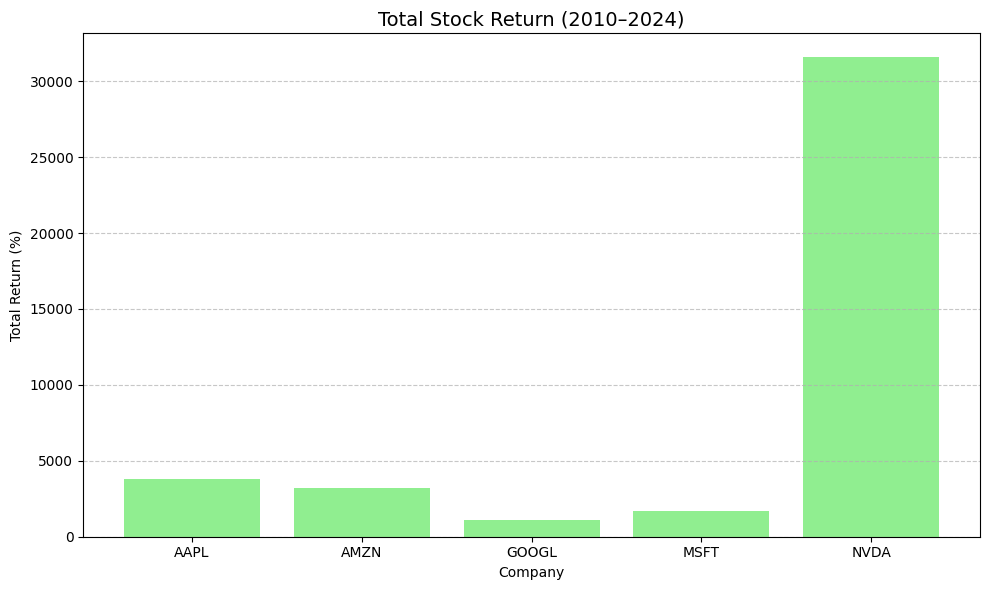

In [20]:
# Import the necessary plotting library
import matplotlib.pyplot as plt

# Recalculate total return percentages (if not already done)
returns = {}

# Loop through each stock and calculate total return
for ticker in ["AAPL", "AMZN", "GOOGL", "MSFT", "NVDA"]:
    start_price = df[f"Close_{ticker}"].iloc[0]
    end_price = df[f"Close_{ticker}"].iloc[-1]
    total_return = ((end_price - start_price) / start_price) * 100
    returns[ticker] = round(total_return, 2)  # Convert to percentage

# Create a bar chart to visualize the total returns
plt.figure(figsize=(10, 6))  # Set the size of the chart
plt.bar(returns.keys(), returns.values(), color='lightgreen')  # Plot bars

# Add labels and title to make the chart clear
plt.title("Total Stock Return (2010–2024)", fontsize=14)
plt.xlabel("Company")
plt.ylabel("Total Return (%)")

# Add horizontal gridlines for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing so labels don’t get cut off
plt.tight_layout()

# Display the plot
plt.show()

### Step 5: Visual Comparison of Total Stock Returns (2010–2024)

This bar chart presents the total return percentage of each company’s stock from 2010 to 2024. Each bar represents the percentage increase in price from the stock’s first closing value in 2010 to its final value in 2024.

By removing daily noise, this chart focuses solely on long-term capital appreciation and makes it easy to compare performance over a 15-year window.

Key Observations:
	•	Nvidia (NVDA) is an extraordinary outlier, delivering a return of over 30,000%, reflecting explosive long-term growth.
	•	Apple (AAPL) and Amazon (AMZN) show strong, consistent returns in the ~3,000% range.
	•	Google (GOOGL) falls behind the top three, with more moderate returns.
	•	Microsoft (MSFT), while globally dominant and stable, posted the lowest total return in this group during the period.

This visualization is valuable for highlighting disproportionate gains that may not be obvious from daily prices alone. It reinforces how dramatically different long-term investments can perform, even among top tech firms..

Business Question:
Which company showed the strongest long-term growth?
How do total returns compare over the 15-year period?

Answer:
Nvidia clearly stands out, outperforming every other company with a return exceeding 30,000%. Apple and Amazon delivered impressive multi-fold gains. Google showed steady but smaller appreciation, while Microsoft had the lowest overall growth despite its dominant market position.

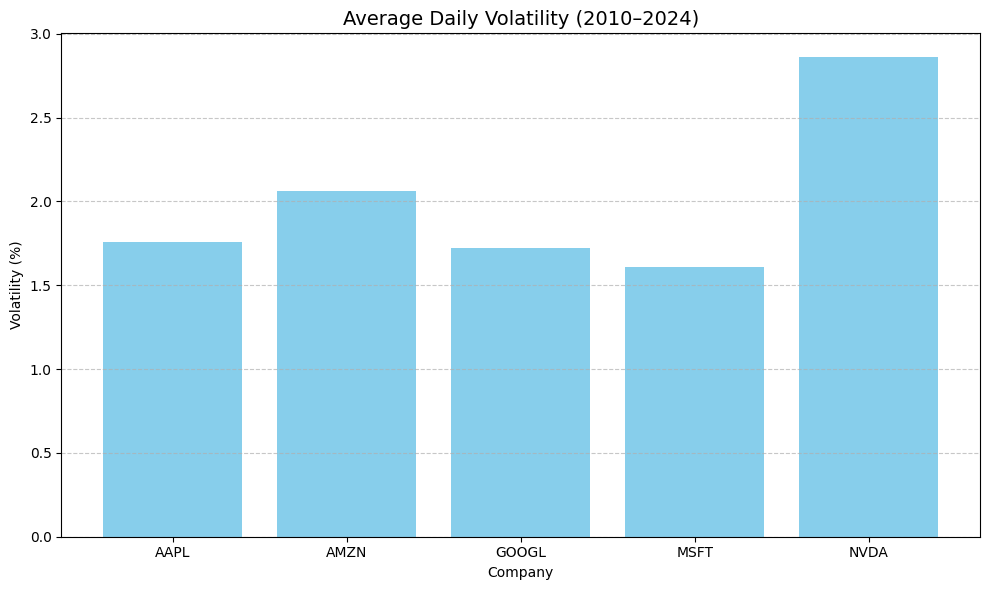

In [15]:
# Import the necessary plotting library
import matplotlib.pyplot as plt

# Recalculate average daily volatility as percentages (if not already done)
volatility = {}

# Loop through each stock and calculate daily return volatility
for ticker in ["AAPL", "AMZN", "GOOGL", "MSFT", "NVDA"]:
    daily_returns = df[f"Close_{ticker}"].pct_change()
    volatility[ticker] = round(daily_returns.std() * 100, 2)  # Convert to percentage

# Create a bar chart to visualize the volatility
plt.figure(figsize=(10, 6))  # Set the size of the chart
plt.bar(volatility.keys(), volatility.values(), color='skyblue')  # Plot bars

# Add labels and title to make the chart clear
plt.title("Average Daily Volatility (2010–2024)", fontsize=14)
plt.xlabel("Company")
plt.ylabel("Volatility (%)")

# Add horizontal gridlines for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing so labels don’t get cut off
plt.tight_layout()

# Display the plot
plt.show()

## Step 6: Visualize Volatility with a Bar Chart

After calculating the volatility for each company, we use a bar chart to visually compare their risk profiles based on average daily price fluctuation from 2010 to 2024. A higher bar indicates greater volatility — meaning the stock experiences larger day-to-day swings.

This visualization is helpful for:
	• Identifying which companies are more stable vs. more volatile
	•Understanding risk before making long-term investments
	• Supporting portfolio strategy with historical behavior insights

Business Question:
How do the risk profiles of these companies compare visually?
Which company had the highest average daily volatility?

Answer:
Nvidia (NVDA) shows the highest volatility, indicating its aggressive growth and higher risk. Amazon (AMZN) and Google (GOOGL) fall in the mid-range. Apple (AAPL) is lower, but Microsoft (MSFT) has the lowest volatility overall, showing the most consistent and stable price behavior among the group.